In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("transaction_dataset.csv")

In [ ]:
data.columns=data.columns.str.strip().str.replace(r'\b\s+\b','_',regex=True)
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg_min_between_sent_tnx',
       'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last (Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions (including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_avg_time_between_sent_tnx',
       'ERC20_avg_time_be

In [ ]:
data.duplicated(subset="Index").sum()

5112

In [ ]:
#proportion of Flag in overall data
data['FLAG'].value_counts(normalize=True)

FLAG
0    0.778579
1    0.221421
Name: proportion, dtype: float64

In [ ]:
#proportion of flag in duplicated_rows
data[data.duplicated(subset='Index')]['FLAG'].value_counts(normalize=True)


FLAG
0    0.573748
1    0.426252
Name: proportion, dtype: float64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data=data.drop(columns=['Unnamed: 0','Index', 'Address'])

In [ ]:
data.columns

Index(['FLAG', 'Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last (Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions (including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_avg_time_between_sent_tnx',
       'ERC20_avg_time_between_rec_tnx', 'ERC20_avg_time_between_r

In [ ]:
#sepearte the categorical variables
categories=data.select_dtypes(include='object').columns
print(categories)

Index(['ERC20_most_sent_token_type', 'ERC20_most_rec_token_type'], dtype='object')


In [ ]:
#inspect categoricals
for i in data[categories].columns:
  print(f'The categorical column {i} has {data[i].nunique()} unique values and {data[i].isnull().sum()} missing values')

The categorical column ERC20_most_sent_token_type has 304 unique values and 2697 missing values
The categorical column ERC20_most_rec_token_type has 466 unique values and 871 missing values


In [ ]:
#seperate numerical variables
numerics=data.select_dtypes(include='number').columns

In [ ]:
#inspect feature with constant variance
data[numerics].var()[data[numerics].var()==0].index
constant_cols=data[numerics].var()[data[numerics].var()==0].index
constant_cols

Index(['ERC20_avg_time_between_sent_tnx', 'ERC20_avg_time_between_rec_tnx',
       'ERC20_avg_time_between_rec_2_tnx',
       'ERC20_avg_time_between_contract_tnx', 'ERC20_min_val_sent_contract',
       'ERC20_max_val_sent_contract', 'ERC20_avg_val_sent_contract'],
      dtype='object')

In [ ]:
#drop constant features
data.drop(constant_cols, axis=1, inplace=True)

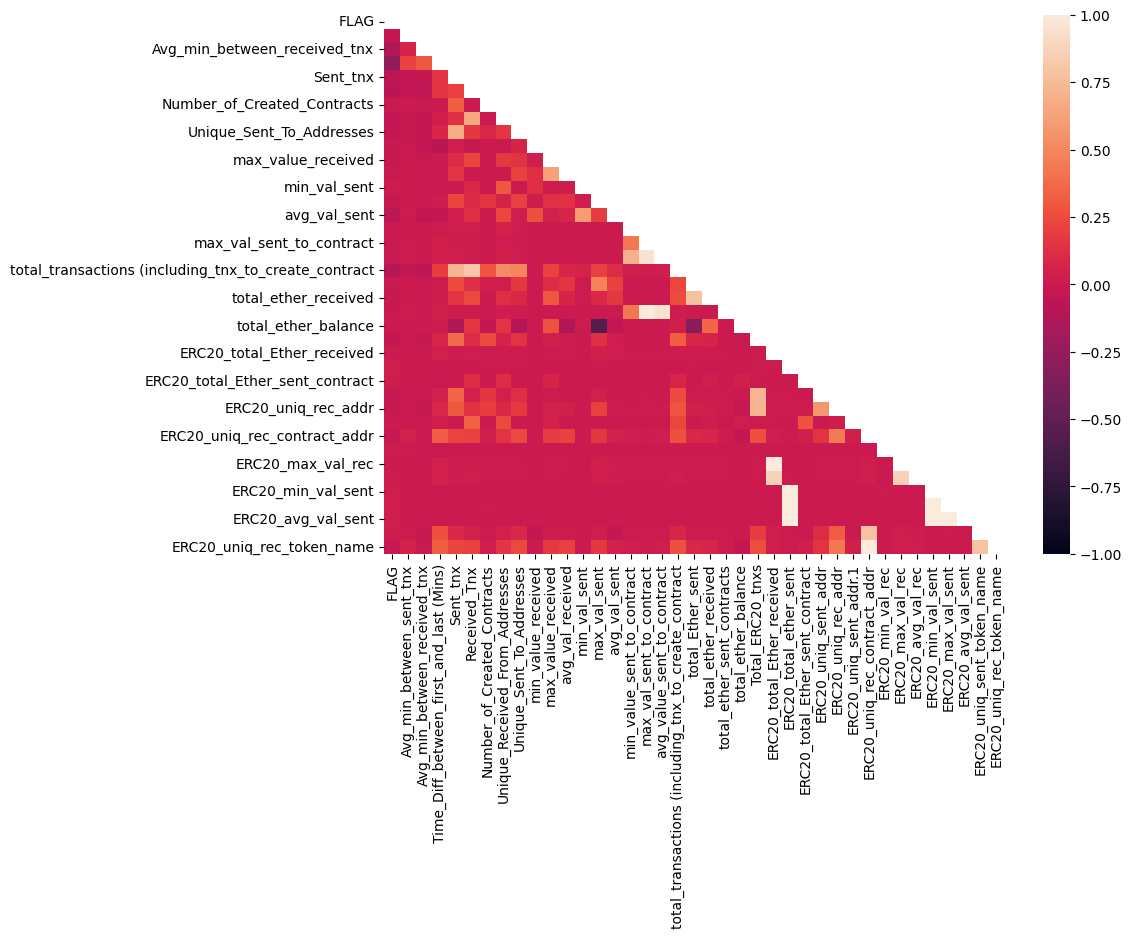

In [ ]:
#correlation matrix
plt.figure(figsize=(10,7))
numerics=data.select_dtypes(include='number').columns
corr=data[numerics].corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask=mask, annot=False, vmin=-1, vmax=1)
plt.show()

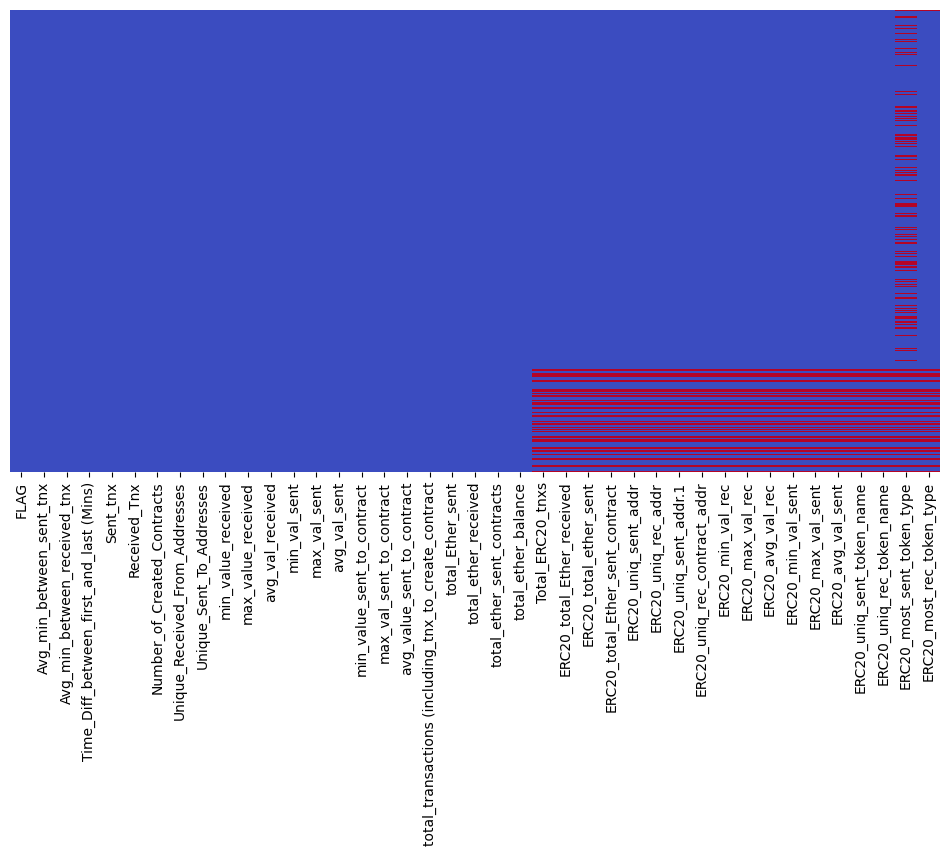

In [ ]:
#visualize missing patters of the data frame
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),cmap="coolwarm", cbar=False)
plt.yticks([])
plt.show()

In [ ]:
data.columns

Index(['FLAG', 'Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last (Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions (including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_min_val_rec',
       'ERC20_max_val_rec', 'ERC20_avg_val_rec', 'ERC20_min_val_sent',
       'E

In [ ]:
data=data.drop("ERC20_most_sent_token_type", axis=1)

In [ ]:
data.columns

Index(['FLAG', 'Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last (Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions (including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_min_val_rec',
       'ERC20_max_val_rec', 'ERC20_avg_val_rec', 'ERC20_min_val_sent',
       'E

In [ ]:
#count rows with missing data
missing_rows_count=data.isnull().any(axis=1).sum()
print(f"The number of rows with missingg data is:{missing_rows_count}")

The number of rows with missingg data is:871


In [ ]:
#check the flag variable for rows with missing data
missing_mask=data.isnull().any(axis=1)
print(data.loc[missing_mask,'FLAG'].value_counts())
print(" ")
print(round(data.loc[missing_mask,'FLAG'].value_counts(normalize=True),2))



FLAG
1    829
0     42
Name: count, dtype: int64
 
FLAG
1    0.95
0    0.05
Name: proportion, dtype: float64


In [ ]:
#Target distribution
print(data['FLAG'].value_counts())
print(" ")
print(round(data['FLAG'].value_counts(normalize=True),2))

FLAG
0    7662
1    2179
Name: count, dtype: int64
 
FLAG
0    0.78
1    0.22
Name: proportion, dtype: float64


In [ ]:
#rows other than the ones with missing data
print(data[~missing_mask].shape)

data_sub= data[~missing_mask]





(8970, 40)


In [ ]:
#split the data into training(80%) and testing(20%) set
X=data_sub.drop('FLAG', axis=1)
y=data_sub['FLAG']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
categories=data.select_dtypes(include='object').columns
len(categories)

1

In [ ]:
!pip install category_encoders
from category_encoders import TargetEncoder

In [ ]:
#initialise the TargetEncoder
encoder=TargetEncoder(cols=categories)
#fit and transform the train data
X_train_encoded=encoder.fit_transform(X_train,y_train)
# transform the test data
X_test_encoded=encoder.transform(X_test)


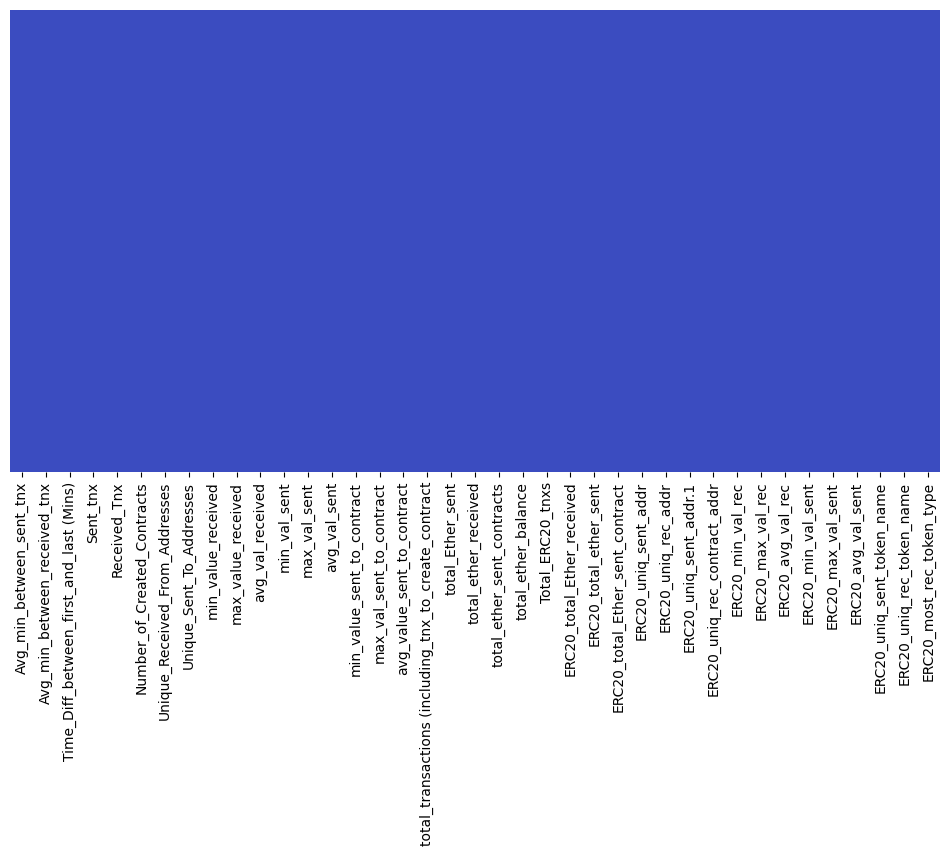

In [ ]:
#visualize missing patters of the data frame
plt.figure(figsize=(12,6))
sns.heatmap(X_train_encoded.isnull(),cmap="coolwarm", cbar=False)
plt.yticks([])
plt.show()

In [ ]:
X_train_encoded.isnull().sum()


Avg_min_between_sent_tnx                                0
Avg_min_between_received_tnx                            0
Time_Diff_between_first_and_last (Mins)                 0
Sent_tnx                                                0
Received_Tnx                                            0
Number_of_Created_Contracts                             0
Unique_Received_From_Addresses                          0
Unique_Sent_To_Addresses                                0
min_value_received                                      0
max_value_received                                      0
avg_val_received                                        0
min_val_sent                                            0
max_val_sent                                            0
avg_val_sent                                            0
min_value_sent_to_contract                              0
max_val_sent_to_contract                                0
avg_value_sent_to_contract                              0
total_transact

In [ ]:
#concatinating x and y
train=pd.concat([X_train_encoded, y_train], axis=1)
test=pd.concat([X_test_encoded, y_test], axis=1)


In [ ]:
from sklearn.ensemble import IsolationForest
#create an Isolation Forest model
isolation_forest=IsolationForest(contamination='auto',random_state=123)

#train the model on training set
isolation_forest.fit(train)

#predict outliers on both training and testing sets
# -1 indicates an outlier, 1 indicates as in liner
anamoly_train_pred=isolation_forest.predict(train)
anamoly_test_pred=isolation_forest.predict(test)


#print the no of outliers in the training set
is_train=np.sum(anamoly_train_pred == -1)
is_test=np.sum(anamoly_test_pred == -1)

print(f"no of outlier in training set {is_train}")
print(f"no of outlier in testing set {is_test}")




no of outlier in training set 229
no of outlier in testing set 60


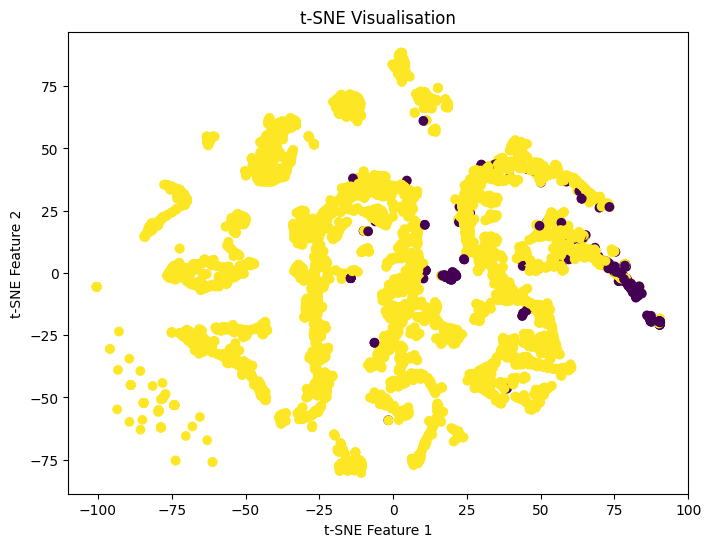

In [ ]:
from sklearn.manifold import TSNE
#create and fit TSNE transformer
tsne=TSNE( n_components=2, random_state=123)
X_train_tsne=tsne.fit_transform(X_train_encoded)

#visualize the transform data
plt.figure(figsize=(8,6))
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=anamoly_train_pred)
plt.title('t-SNE Visualisation')
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()



[[ 18.051165  22.188852]
 [ 40.170773  17.733147]
 [ 30.170067 -16.031462]
 ...
 [ 31.974777 -17.695585]
 [ 45.343987   9.325277]
 [-17.07529  -49.40257 ]]


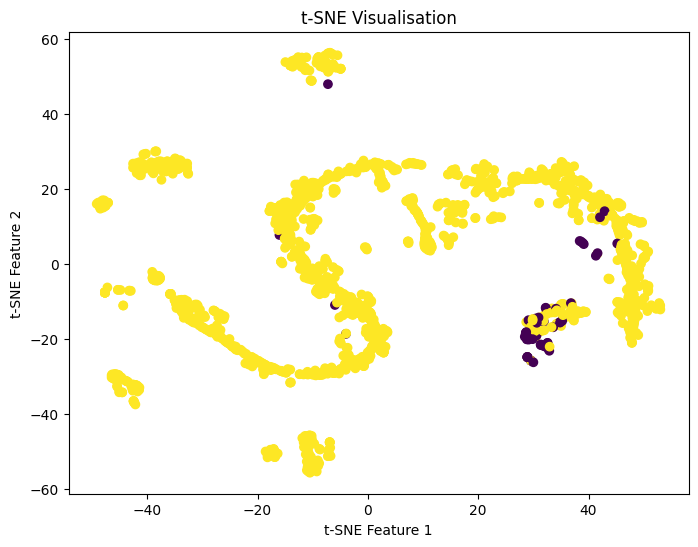

In [ ]:
#visualisation for test_data
X_test_tsne=tsne.fit_transform(X_test_encoded)
print(X_test_tsne)
#visualize for test_data
plt.figure(figsize=(8,6))
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1],c=anamoly_test_pred)
plt.title("t-SNE Visualisation")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()




